# Linear regression

**date**
: 2021-04-18

**data**
: `cholesterol.csv`

**ref**
: Computer book C, activity 3

**desc**
: Linear regression in Python with `sklean`.

In [1]:
from scripts.data import Data
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample = Data.load_cholesterol()

In [3]:
sample.head()

,Cholesterol,Age
0,3.8,43
1,3.5,46
2,4.2,48
3,4.0,49
4,3.3,50


The sample contains data on the total cholesterol levels measured for 11 individuals aged over 40 years.
Estimate the least squares line for the sample and check the assumptions of the model.

In [4]:
# Age, Cholesterol to arrays
age = sample["Age"].to_numpy()
cholesterol = sample["Cholesterol"].to_numpy()

In [5]:
# reshape X=age to 2D array
age = age.reshape(-1, 1)

In [6]:
# create the model
regr = LinearRegression().fit(age, cholesterol)

Output the the coefficients of the model.

In [7]:
print(f"intercept: {regr.intercept_}")
print(f"slope: {regr.coef_}")

intercept: 1.8889519876097078
slope: [0.04073309]


Visualise the model by overlaying a line plot on top of a scatterplot.

In [8]:
# make the predictions using the model
y_pred = regr.predict(age)

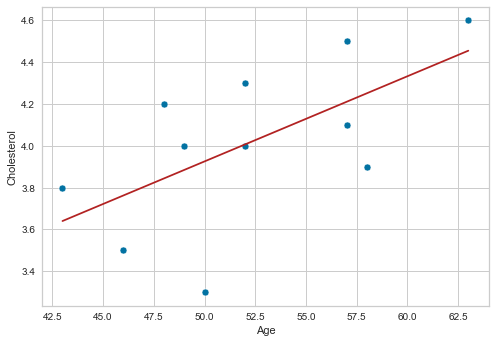

In [9]:
f, ax = plt.subplots()
sns.scatterplot(
    data=sample,
    x="Age",
    y="Cholesterol"
)
sns.lineplot(
    x=sample["Age"],
    y=y_pred,
    color="firebrick"
)
plt.show()

Plot the residuals

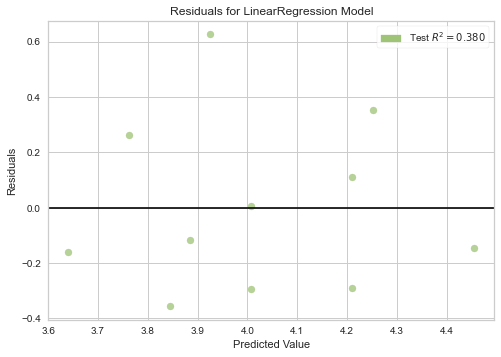

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
visualizer = ResidualsPlot(regr, hist=False)
visualizer.score(age, cholesterol)  # Evaluate the model on the test data
visualizer.show()

In [11]:
# calculate residuals
res = cholesterol - y_pred

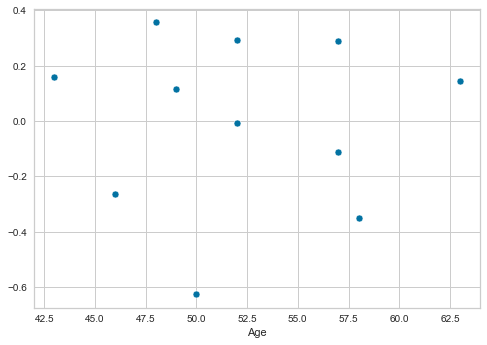

In [12]:
f, ax = plt.subplots()
sns.scatterplot(
    x=sample["Age"],
    y=res
)
plt.show()

Check residuals with normal probability plot

In [13]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr